In [7]:
import pandas as pd

df = pd.read_csv("SPD.csv")
df["Offense Parent Group"].value_counts()


LARCENY-THEFT                               191118
ASSAULT OFFENSES                             73542
BURGLARY/BREAKING&ENTERING                   54670
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY     44121
MOTOR VEHICLE THEFT                          29584
FRAUD OFFENSES                               27910
TRESPASS OF REAL PROPERTY                    20677
ROBBERY                                      12300
DRUG/NARCOTIC OFFENSES                       10926
DRIVING UNDER THE INFLUENCE                   6540
WEAPON LAW VIOLATIONS                         4478
STOLEN PROPERTY OFFENSES                      3113
COUNTERFEITING/FORGERY                        2833
BAD CHECKS                                    2276
PROSTITUTION OFFENSES                         1754
EMBEZZLEMENT                                   954
ARSON                                          850
LIQUOR LAW VIOLATIONS                          615
EXTORTION/BLACKMAIL                            502
CURFEW/LOITERING/VAGRANCY VIOLA

In [ ]:
# Question 1

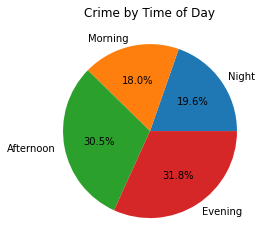

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv('SPD.csv')

# Convert the 'Offense Start DateTime' column to a datetime object
df['Offense Start DateTime'] = pd.to_datetime(df['Offense Start DateTime'])

# Define the time ranges
night = ((df['Offense Start DateTime'].dt.hour >= 0) & (df['Offense Start DateTime'].dt.hour < 6))
morning = ((df['Offense Start DateTime'].dt.hour >= 6) & (df['Offense Start DateTime'].dt.hour < 12))
afternoon = ((df['Offense Start DateTime'].dt.hour >= 12) & (df['Offense Start DateTime'].dt.hour < 18))
evening = ((df['Offense Start DateTime'].dt.hour >= 18) & (df['Offense Start DateTime'].dt.hour < 24))

# Group the crimes by time range
night_crimes = df.loc[night]
morning_crimes = df.loc[morning]
afternoon_crimes = df.loc[afternoon]
evening_crimes = df.loc[evening]

# Create a list of the crime counts for each time range
crime_counts = [len(night_crimes), len(morning_crimes), len(afternoon_crimes), len(evening_crimes)]

# Create a list of the time range labels
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create the pie chart
plt.pie(crime_counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Crime Committed in Seattle by Time of Day')

# Create and show the legend
# legend_labels = ['12AM-5:59AM', '6AM-11:59PM', '12PM-5:59PM', '6PM-11:59PM']
# plt.legend(legend_labels, loc='best')

# Show the chart
plt.show()

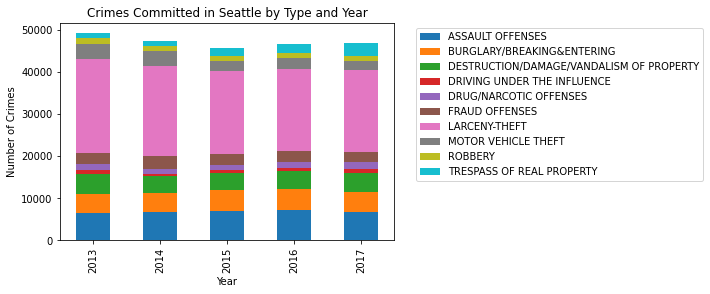

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data set into a pandas DataFrame
df = pd.read_csv('SPD_Crime_Data__2008-Present (1).csv')

# Get the top 10 most committed offense parent groups
top_groups = df['Offense Parent Group'].value_counts().nlargest(10).index.tolist()

# Filter the data to include only the top 10 groups
df = df[df['Offense Parent Group'].isin(top_groups)]

# Group the data by year and crime type, and count the number of occurrences of each crime
grouped = df.groupby(['year', 'Offense Parent Group']).size().unstack()

# Create a stacked bar chart
grouped.plot(kind='bar', stacked=True)

# Add labels and titles
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Top 10 Common Crimes Committed in Seattle by Type and Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()




In [ ]:
#Question 3

In [9]:
df3 = pd.read_csv("Seattle_Population_Data.csv")
df3["total_pop"] = df3["Born in USA"] + df3["Citizen by Naturalization"] + df3["Not a Citizen"] + df3["Born Abroad"]
df3 = df3[["label", "total_pop"]]
df3 = df3[df3["label"] > 2012]
table = df[df["year"] <= 2020]
table = table.groupby("year")["Offense"].count()
table = pd.DataFrame({'year': table.index, 'offense': table.values})
table.sort_values('year', ascending=False)
x= []
for i in range(len(table)):
  y = (table["offense"][i]/df3['total_pop'][i])*100
  x.append(y)
table["percent_increase"] = x
table

,year,offense,percent_increase
0,2013,51136,6.912736
1,2014,49125,6.795687
2,2015,47659,6.739484
3,2016,48835,7.113464
4,2017,51232,7.682941
5,2018,51954,7.978488
6,2019,48612,7.644538
7,2020,48281,7.750991


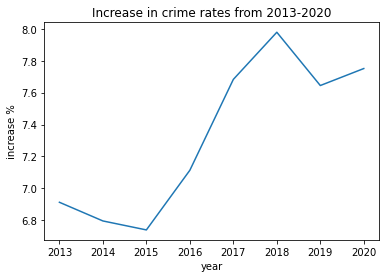

In [15]:
import matplotlib.pyplot as plt

# Create a line chart
plt.plot(table['year'], table['percent_increase'])


# Add labels and title
plt.xlabel('year')
plt.ylabel('increase %')
plt.title('Increase in crime rates from 2013-2020')
plt.show()